In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoTokenizer


In [2]:
train_df = pd.read_csv('train.csv')
train_df

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0
...,...,...,...,...,...,...
9319,boostcamp-sts-v1-train-9319,petition-sampled,교원능력개발평가에서 교원이 보호받을 수 있는 장치를 마련해야합니다,본인이 납부한 국민연금 금액을 기준으로 대출을 받을 수 있는 제도를 마련해 주세요,0.2,0.0
9320,boostcamp-sts-v1-train-9320,petition-sampled,여성가족부의 폐지를 원합니드,여성가족부 폐지를 청원 합니다.,4.2,1.0
9321,boostcamp-sts-v1-train-9321,petition-sampled,국회의원들 월급좀 줄여주세요,공무원 봉급좀 줄이지좀 마세요,0.6,0.0
9322,boostcamp-sts-v1-train-9322,slack-sampled,오늘 못한 점심은 다음에 다시 츄라이 하기로 해요!!,오늘 못먹은 밥은 꼭 담에 먹기로 하고요!!,3.2,1.0


In [3]:
train_df.describe()

,label,binary-label
count,9324.000000,9324.000000
mean,1.849968,0.389532
std,1.602212,0.487670
min,0.000000,0.000000
25%,0.200000,0.000000
50%,1.600000,0.000000
75%,3.400000,1.000000
max,5.000000,1.000000


In [4]:
model_checkpoint = 'klue/roberta-small'
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

In [5]:
test = tokenizer(train_df['sentence_1'][0])
test

{'input_ids': [0, 15314, 2119, 2689, 2088, 8984, 2119, 1513, 2088, 11934, 3629, 16516, 6614, 2031, 19521, 2259, 4540, 2052, 4405, 2203, 2182, 97, 2], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [6]:
decode_str = tokenizer.decode(test["input_ids"])
decode_str

'[CLS] 스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요 ~ [SEP]'

In [7]:
train_df['sentence_1'].tolist()

['스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~',
 '앗 제가 접근권한이 없다고 뜹니다;;',
 '주택청약조건 변경해주세요.',
 '입사후 처음 대면으로 만나 반가웠습니다.',
 '뿌듯뿌듯 하네요!!',
 '오마이가뜨지져스크롸이스트휏',
 '전 암만 찍어도 까만 하늘.. ㅠㅠ',
 '이렇게 귀여운 쥐들은 처음이네요.ㅎㅎㅎ',
 '미세먼지 해결이 가장 시급한 문제입니다!',
 '크림하우스 환불조치해주세요.',
 '그 책부터 언능 꺼내봐야 겠어요!',
 '극의전개가너무느릿하여답답합니다',
 '오랫만에 존쿠삭의 연기보니 좋네요 Good~~!!',
 '글쎄.. 특색도 없고 별로였던 걸로 기억하는데..',
 '아래는 게임 내에서 함께 팀을 맺고 캡쳐한 이미지입니다.',
 'LG전자 스마트폰 생산 중단 청원',
 '환갑이면? ㅎㅎㅎ 이런 재미난 얘기하느라 시간이 금방 가더라고요.',
 '최종구 금융위원장을 파면하라!',
 '정말 간절히 정부의 도움이 필요합니다.',
 '내년 러시아월드컵 자진포기 청원드립니다.',
 '앞머리 새로 하셨습니다. ^^',
 '김기덕 조재현 성폭행 철저히 수사해주세요!',
 '답답할 때 보면 속이 뻥 뚫릴 것 같아요',
 '노래와 잘 어우러지는 영상 덕분인지 짧지만 강한 인상이 남네요..',
 '군대가기전에 봤었는데 진짜 윈터스같은 사람이 상관이면 목숨걸고 싸워도 후회는 없지 않을까? 라고 생각했던게 기억이 나네요 ㅎㅎ',
 '국민청원에 올린글 삭제하는 청와대뉴미디어정책실은 억울한 피해자를 죽이고 경찰에게 증거제출하고 악플러를 살려주기위해 은폐하고있습니다.',
 '전두환을 처벌해주세요',
 '마지막으로 리모트 근무의 장점에 대해 이야기했는데, 시간을 효율적으로 사용할 수 있다는 점에 감사하며 다시 한번 리모트 근무의 장점을 느낄 수 있었습니다 ㅎㅎ',
 '겨울산이 예쁘지만 산을 잘 못타서 대리만족 중입니당',
 '한사람의 파멸을 적나라하게 드러내 준 영화',
 '금융워원회의 공모주 개인 배정 축소(폐지)를 막아주세요'

In [8]:
train_df['token_1'] = train_df['sentence_1'].apply(tokenizer.tokenize)
train_df['token_2'] = train_df['sentence_2'].apply(tokenizer.tokenize)
train_df

,id,source,sentence_1,sentence_2,label,binary-label,token_1,token_2
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0,"[스릴, ##도, ##있, ##고, 반전, ##도, 있, ##고, 여느, 한국, #...","[반전, ##도, 있, ##고, ,, 사랑, ##도, 있, ##고, ##재, ##미..."
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0,"[앗, 제, ##가, 접근, ##권, ##한, ##이, 없, ##다고, [UNK],...","[오, ,, 액세, ##스, 권한, ##이, 없, ##다고, 합니다, .]"
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0,"[주택, ##청, ##약, ##조건, 변경, ##해, ##주, ##세요, .]","[주택, ##청, ##약, 무주택, ##기, ##준, 변경, ##해, ##주, ##..."
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0,"[입사, ##후, 처음, 대면, ##으로, 만나, 반가웠, ##습, ##니다, .]","[화상, ##으로, ##만, 보다, ##가, 리얼, ##로, 만나, ##니, 정말,..."
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0,"[뿌듯, ##뿌, ##듯, 하, ##네, ##요, !, !]","[꼬, ##옥, 실제로, 한번, 뵈, ##어요, 뿌, ##뿌, ##뿌, ~, !, ..."
...,...,...,...,...,...,...,...,...
9319,boostcamp-sts-v1-train-9319,petition-sampled,교원능력개발평가에서 교원이 보호받을 수 있는 장치를 마련해야합니다,본인이 납부한 국민연금 금액을 기준으로 대출을 받을 수 있는 제도를 마련해 주세요,0.2,0.0,"[교원, ##능력, ##개발, ##평가, ##에서, 교원, ##이, 보호, ##받,...","[본인, ##이, 납부, ##한, 국민, ##연금, 금액, ##을, 기준, ##으로..."
9320,boostcamp-sts-v1-train-9320,petition-sampled,여성가족부의 폐지를 원합니드,여성가족부 폐지를 청원 합니다.,4.2,1.0,"[여성, ##가족, ##부, ##의, 폐지, ##를, 원, ##합, ##니, ##드]","[여성, ##가족, ##부, 폐지, ##를, 청원, 합니다, .]"
9321,boostcamp-sts-v1-train-9321,petition-sampled,국회의원들 월급좀 줄여주세요,공무원 봉급좀 줄이지좀 마세요,0.6,0.0,"[국회의원, ##들, 월급, ##좀, 줄여, ##주, ##세요]","[공무원, 봉급, ##좀, 줄이, ##지, ##좀, 마세요]"
9322,boostcamp-sts-v1-train-9322,slack-sampled,오늘 못한 점심은 다음에 다시 츄라이 하기로 해요!!,오늘 못먹은 밥은 꼭 담에 먹기로 하고요!!,3.2,1.0,"[오늘, 못한, 점심, ##은, 다음, ##에, 다시, 츄, ##라이, 하, ##기...","[오늘, 못, ##먹, ##은, 밥, ##은, 꼭, 담, ##에, 먹, ##기, #..."


In [44]:
train_df["token_len1"] = train_df['token_1'].apply(len)
train_df["token_len2"] = train_df['token_2'].apply(len)
train_df

,id,source,sentence_1,sentence_2,label,binary-label,token_1,token_2,token_len1,token_len2
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0,"[스릴, ##도, ##있, ##고, 반전, ##도, 있, ##고, 여느, 한국, #...","[반전, ##도, 있, ##고, ,, 사랑, ##도, 있, ##고, ##재, ##미...",21,16
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0,"[앗, 제, ##가, 접근, ##권, ##한, ##이, 없, ##다고, [UNK],...","[오, ,, 액세, ##스, 권한, ##이, 없, ##다고, 합니다, .]",12,10
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0,"[주택, ##청, ##약, ##조건, 변경, ##해, ##주, ##세요, .]","[주택, ##청, ##약, 무주택, ##기, ##준, 변경, ##해, ##주, ##...",9,11
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0,"[입사, ##후, 처음, 대면, ##으로, 만나, 반가웠, ##습, ##니다, .]","[화상, ##으로, ##만, 보다, ##가, 리얼, ##로, 만나, ##니, 정말,...",10,14
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0,"[뿌듯, ##뿌, ##듯, 하, ##네, ##요, !, !]","[꼬, ##옥, 실제로, 한번, 뵈, ##어요, 뿌, ##뿌, ##뿌, ~, !, ...",8,13
...,...,...,...,...,...,...,...,...,...,...
9319,boostcamp-sts-v1-train-9319,petition-sampled,교원능력개발평가에서 교원이 보호받을 수 있는 장치를 마련해야합니다,본인이 납부한 국민연금 금액을 기준으로 대출을 받을 수 있는 제도를 마련해 주세요,0.2,0.0,"[교원, ##능력, ##개발, ##평가, ##에서, 교원, ##이, 보호, ##받,...","[본인, ##이, 납부, ##한, 국민, ##연금, 금액, ##을, 기준, ##으로...",18,23
9320,boostcamp-sts-v1-train-9320,petition-sampled,여성가족부의 폐지를 원합니드,여성가족부 폐지를 청원 합니다.,4.2,1.0,"[여성, ##가족, ##부, ##의, 폐지, ##를, 원, ##합, ##니, ##드]","[여성, ##가족, ##부, 폐지, ##를, 청원, 합니다, .]",10,8
9321,boostcamp-sts-v1-train-9321,petition-sampled,국회의원들 월급좀 줄여주세요,공무원 봉급좀 줄이지좀 마세요,0.6,0.0,"[국회의원, ##들, 월급, ##좀, 줄여, ##주, ##세요]","[공무원, 봉급, ##좀, 줄이, ##지, ##좀, 마세요]",7,7
9322,boostcamp-sts-v1-train-9322,slack-sampled,오늘 못한 점심은 다음에 다시 츄라이 하기로 해요!!,오늘 못먹은 밥은 꼭 담에 먹기로 하고요!!,3.2,1.0,"[오늘, 못한, 점심, ##은, 다음, ##에, 다시, 츄, ##라이, 하, ##기...","[오늘, 못, ##먹, ##은, 밥, ##은, 꼭, 담, ##에, 먹, ##기, #...",15,16


<AxesSubplot: xlabel='count', ylabel='source'>

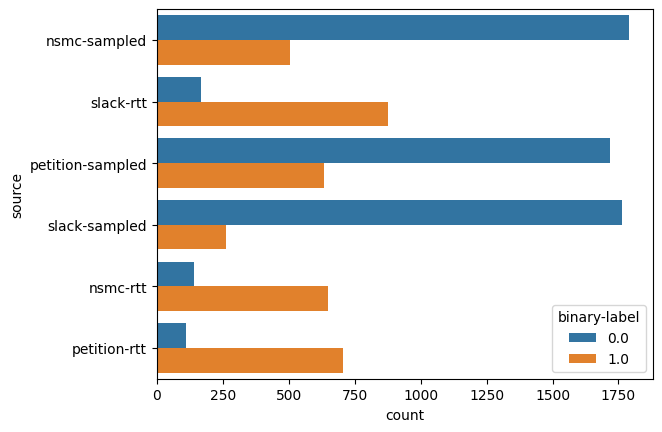

In [9]:
sns.countplot(y='source',hue='binary-label',data=train_df)

Text(0, 0.5, 'token_len')

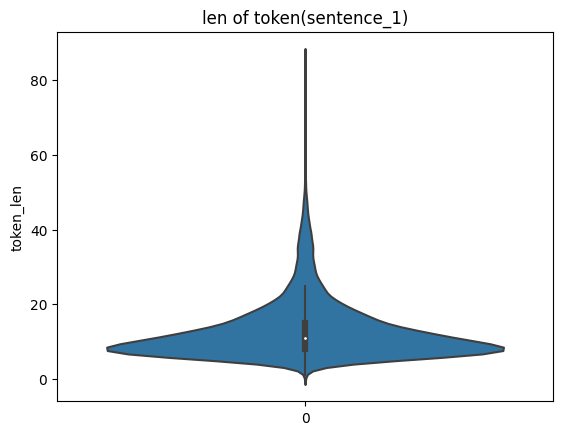

In [10]:
g = sns.violinplot(data=train_df['token_1'].apply(len))
plt.title("len of token(sentence_1)")
plt.ylabel("token_len")

Text(0, 0.5, 'token_len')

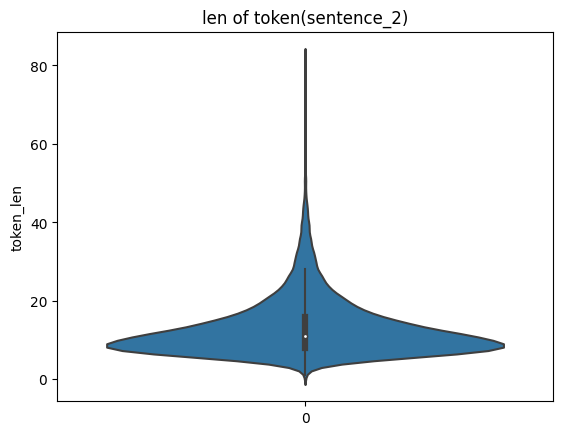

In [11]:
g = sns.violinplot(data=train_df['token_2'].apply(len))
plt.title("len of token(sentence_2)")
plt.ylabel("token_len")

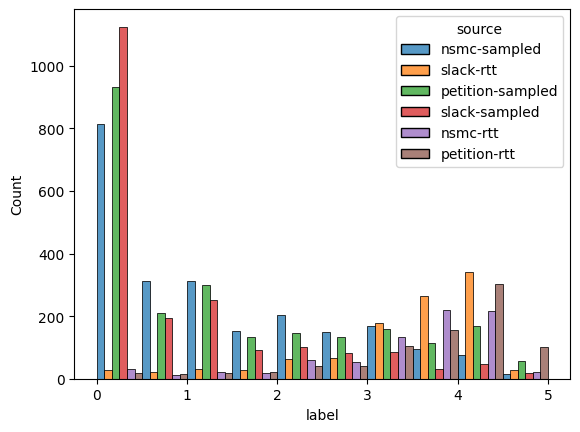

In [35]:
g = sns.histplot(x='label',bins=10, hue='source', data=train_df, multiple='dodge')

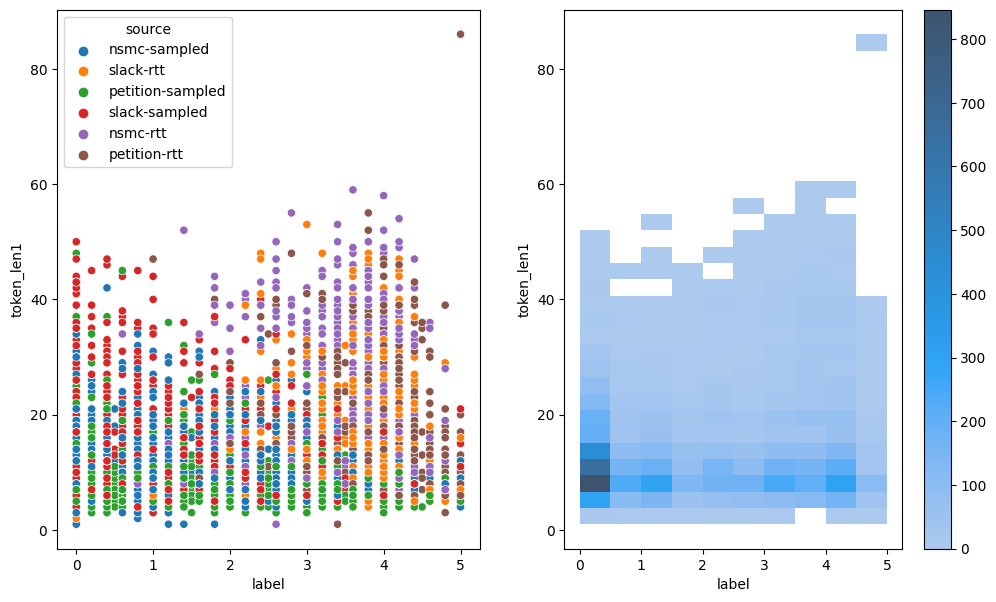

In [65]:
fig, axes = plt.subplots(1, 2, figsize=(12, 7))
sns.scatterplot(x="label", y="token_len1", data=train_df, ax=axes[0], hue='source')
g = sns.histplot(x='label', y="token_len1",data=train_df, bins=(10,30),cbar=True, ax=axes[1])

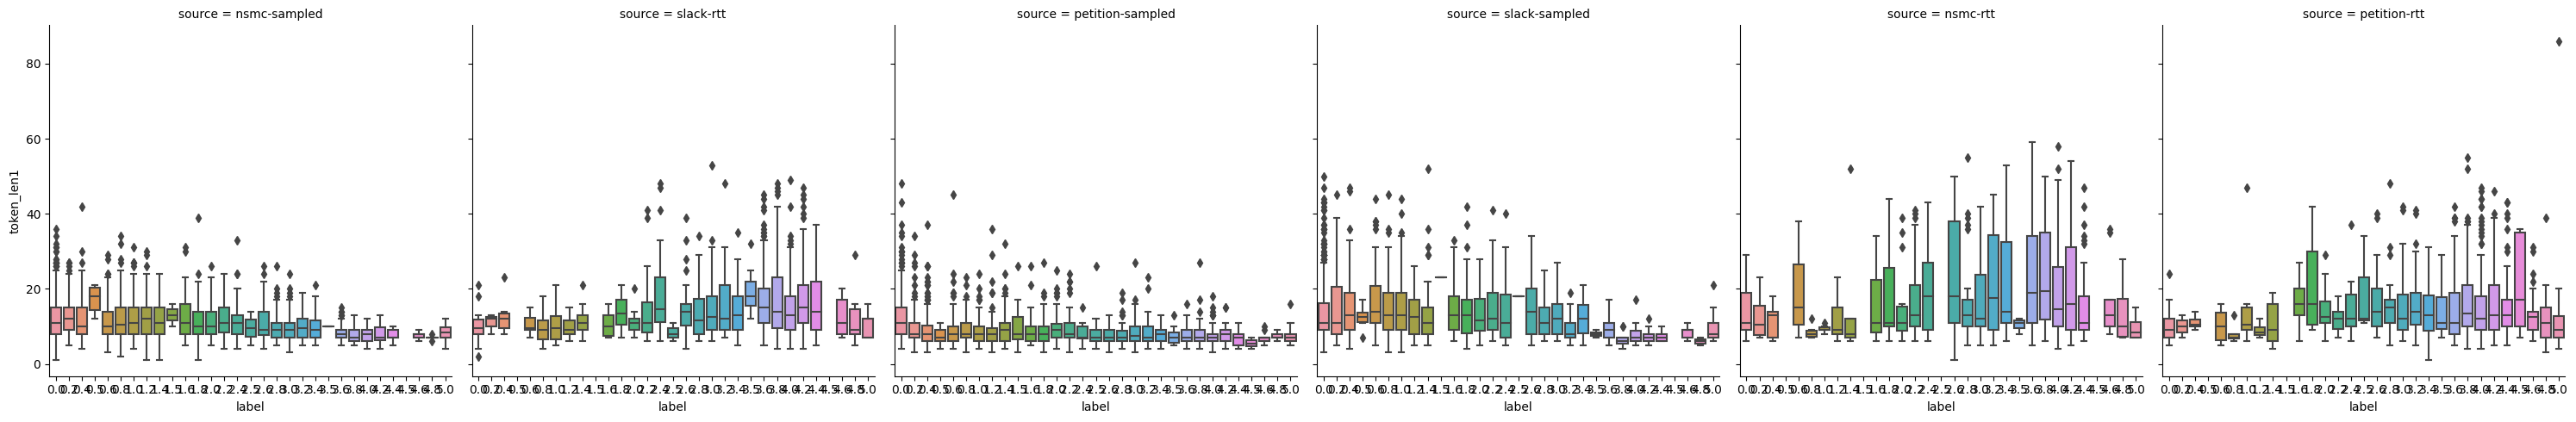

In [70]:
fig, axes = plt.subplot(1, figsize=)
sns.catplot(x='label', y='token_len1', data=train_df, kind='box', col='source')

In [97]:
x = train_df[train_df['source'].isin(['slack-rtt'])]
x = x[x['label'] > 3]
x

,id,source,sentence_1,sentence_2,label,binary-label,token_1,token_2,token_len1,token_len2
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0,"[앗, 제, ##가, 접근, ##권, ##한, ##이, 없, ##다고, [UNK],...","[오, ,, 액세, ##스, 권한, ##이, 없, ##다고, 합니다, .]",12,10
6,boostcamp-sts-v1-train-006,slack-rtt,전 암만 찍어도 까만 하늘.. ㅠㅠ,암만 찍어도 하늘은 까맣다.. ㅠㅠ,3.6,1.0,"[전, 암, ##만, 찍, ##어도, 까만, 하늘, ., ., ㅠㅠ]","[암, ##만, 찍, ##어도, 하늘, ##은, 까맣, ##다, ., ., ㅠㅠ]",10,11
27,boostcamp-sts-v1-train-027,slack-rtt,"마지막으로 리모트 근무의 장점에 대해 이야기했는데, 시간을 효율적으로 사용할 수 있...","마지막으로 재택근무의 장점에 대해 이야기를 나누었고, 시간을 효율적으로 사용할 수 ...",4.2,1.0,"[마지막, ##으로, 리모, ##트, 근무, ##의, 장점, ##에, 대해, 이야기...","[마지막, ##으로, 재, ##택, ##근무, ##의, 장점, ##에, 대해, 이야...",42,43
28,boostcamp-sts-v1-train-028,slack-rtt,겨울산이 예쁘지만 산을 잘 못타서 대리만족 중입니당,겨울산은 예쁜데 제가 등산을 잘 못해서 대만족입니다.,3.2,1.0,"[겨울, ##산, ##이, 예쁘, ##지만, 산, ##을, 잘, 못, ##타, ##...","[겨울, ##산, ##은, 예쁜, ##데, 제, ##가, 등산, ##을, 잘, 못해...",17,15
31,boostcamp-sts-v1-train-031,slack-rtt,지금 아주 만족해요.,지금은 매우 만족합니다.,4.4,1.0,"[지금, 아주, 만족, ##해, ##요, .]","[지금, ##은, 매우, 만족, ##합니다, .]",6,6
...,...,...,...,...,...,...,...,...,...,...
9275,boostcamp-sts-v1-train-9275,slack-rtt,<PERSON> 님 스마트홈 구축은 어떻게 되고 계시나요.,<PERSON> 스마트홈 구축은 어떻게 진행되고 있나요?,4.2,1.0,"[<, PER, ##S, ##ON, >, 님, 스마트, ##홈, 구축, ##은, 어...","[<, PER, ##S, ##ON, >, 스마트, ##홈, 구축, ##은, 어떻게,...",17,17
9276,boostcamp-sts-v1-train-9276,slack-rtt,장미를 왜 끓이는가 했더니..,왜 장미를 끓이세요?,3.2,1.0,"[장미, ##를, 왜, 끓이, ##는, ##가, 했, ##더니, ., .]","[왜, 장미, ##를, 끓이, ##세요, ?]",10,6
9286,boostcamp-sts-v1-train-9286,slack-rtt,ㅋㅋ채널명바꾸고 처음 올라오는 동물이 공작일줄이야?!?!?,ㅋㅋ 채널명 바꾸고 제일 먼저 나오는 동물은 아마 공작이겠죠?!?!?,3.2,1.0,"[ㅋㅋ, ##채, ##널, ##명, ##바, ##꾸, ##고, 처음, 올라오, ##...","[ㅋㅋ, 채널, ##명, 바꾸, ##고, 제일, 먼저, 나오, ##는, 동물, ##...",22,21
9290,boostcamp-sts-v1-train-9290,slack-rtt,그러나 영상 제목은 별로 맘에 안듭니다 ㅎ,하지만 영상 제목이 마음에 들지 않는다.,4.0,1.0,"[그러나, 영상, 제목, ##은, 별로, 맘, ##에, 안, ##듭니다, ㅎ]","[하지만, 영상, 제목, ##이, 마음, ##에, 들, ##지, 않, ##는, ##...",10,12


In [100]:
x = train_df[train_df['source'].isin(['slack-sampled'])]
x = x[x['label'] > 4.5]
x

,id,source,sentence_1,sentence_2,label,binary-label,token_1,token_2,token_len1,token_len2
284,boostcamp-sts-v1-train-284,slack-sampled,정말 즐거웠어요~~~~~~,정말 즐거웠습니다~~~,4.6,1.0,"[정말, 즐거웠, ##어요, ~, ~, ~, ~, ~, ~]","[정말, 즐거웠, ##습, ##니다, ~, ~, ~]",9,7
1290,boostcamp-sts-v1-train-1290,slack-sampled,얘기 너무 즐거웠어요 ㅎㅎ,이야기 너무 즐거웠어요!!,4.8,1.0,"[얘기, 너무, 즐거웠, ##어요, ㅎㅎ]","[이야기, 너무, 즐거웠, ##어요, !, !]",5,6
1354,boostcamp-sts-v1-train-1354,slack-sampled,다음에 또 뵈어요!!,다음에 또 뵈어요~!!,5.0,1.0,"[다음, ##에, 또, 뵈, ##어요, !, !]","[다음, ##에, 또, 뵈, ##어요, ~, !, !]",7,8
2235,boostcamp-sts-v1-train-2235,slack-sampled,축하드립니다!!ㅎㅎㅎ,축하드립니다!! ㅎ,5.0,1.0,"[축하, ##드, ##립니다, !, !, ㅎㅎㅎ]","[축하, ##드, ##립니다, !, !, ㅎ]",6,6
3199,boostcamp-sts-v1-train-3199,slack-sampled,두번째 사진이 흑돼지입니다,두번째 사진이 흑돼지입니다.,5.0,1.0,"[두, ##번, ##째, 사진, ##이, 흑, ##돼지, ##입니다]","[두, ##번, ##째, 사진, ##이, 흑, ##돼지, ##입니다, .]",8,9
3361,boostcamp-sts-v1-train-3361,slack-sampled,확인 한번 부탁드립니다!!,한번 확인 부탁드립니다,4.6,1.0,"[확인, 한번, 부탁, ##드, ##립니다, !, !]","[한번, 확인, 부탁, ##드, ##립니다]",7,5
3961,boostcamp-sts-v1-train-3961,slack-sampled,다음에 또 얘기나눠요!!,다음에 또 이야기나눠요!!,4.6,1.0,"[다음, ##에, 또, 얘기, ##나, ##눠, ##요, !, !]","[다음, ##에, 또, 이야기, ##나, ##눠, ##요, !, !]",9,9
4116,boostcamp-sts-v1-train-4116,slack-sampled,다음에 또 이야기 나눠요~~~,다음에 또 이야기 나눠요~!,5.0,1.0,"[다음, ##에, 또, 이야기, 나눠, ##요, ~, ~, ~]","[다음, ##에, 또, 이야기, 나눠, ##요, ~, !]",9,8
4196,boostcamp-sts-v1-train-4196,slack-sampled,앞으로 잘 부탁드립니다!,앞으로 잘 부탁드립니다!!,4.8,1.0,"[앞, ##으로, 잘, 부탁, ##드, ##립니다, !]","[앞, ##으로, 잘, 부탁, ##드, ##립니다, !, !]",7,8
4845,boostcamp-sts-v1-train-4845,slack-sampled,앞으로도 잘 부탁드려요 !!!,앞으로도 잘 부탁 드립니다!!!,4.6,1.0,"[앞, ##으로, ##도, 잘, 부탁, ##드, ##려, ##요, !, !, !]","[앞, ##으로, ##도, 잘, 부탁, 드립니다, !, !, !]",11,9
